<a href="https://colab.research.google.com/github/fathimajafir/Book-Recommendation-system/blob/main/Book_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Project Title : Book Recommendation System
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

**Content**

The Book-Crossing dataset comprises 3 files.

**Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

**Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

**Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

#<b> Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import random

#<b> Importing Data Frame

In [2]:
books = pd.read_csv("/content/drive/MyDrive/AlmaBetter Projects/Book Recommendation system/Data/Books.csv")

In [3]:
users = pd.read_csv("/content/drive/MyDrive/AlmaBetter Projects/Book Recommendation system/Data/Users.csv")

In [4]:
ratings = pd.read_csv("/content/drive/MyDrive/AlmaBetter Projects/Book Recommendation system/Data/Ratings.csv")

#<b>Data Processing

**Books Data**

In [5]:
#display the first 5 rows of data
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
#shape of the data frame
books.shape

(271360, 8)

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
#checking for null values
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [9]:
#Dropping null values
books.dropna(inplace=True)

In [10]:
#checking for duplicate
books.duplicated().sum()

0

From the above results , we can see the informtion about books . 

Book name , author name , publisher, year of publication etc

There are 271360 rows and 8 columns 

All columns are of object type and contain only very small null values. So we dropped the null values

No duplicate values are there





In [11]:
#shape of the data after dropping the null values 
books.shape

(271354, 8)

In [12]:
#Data frame columns 
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

Now , we are going to treat each column individually 

In [13]:
#'Book-Title' column 
books['Book-Title'].value_counts()


Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
Dracula                                                                                                                           20
The Secret Garden                                                                                                                 20
                                                                                                                                  ..
On a Clear Day You Can See General Motors: John Z. De Lorean's Look Inside the Automotive Giant                                    1
What Every Kid Should Know                                           

In [14]:
#'Book-Author' column
books['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book-Author, Length: 102020, dtype: int64

In [15]:
#'Year-Of-Publication' column
books['Year-Of-Publication'].unique()  #unique publication dates

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [16]:
#we have to convert all the dates to type int 
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [17]:
#checking for values after 2021
books[books['Year-Of-Publication']>2021].value_counts().sum()

13

In [18]:
#only 13 books are published after 2021, so we are dropping values above 2021
books=books[books['Year-Of-Publication']<=2021].reset_index(drop=True)

In [19]:
#some values are zero 
books[books['Year-Of-Publication']==0].value_counts().sum()

4618

In [20]:
#replace the zero by median 

median = books['Year-Of-Publication'].median() # median of books Year-Of-Publication
books['Year-Of-Publication']=books['Year-Of-Publication'].replace(0,median)

Now the book dataframe is almost ready . Next we are looking to the users dataframe

#<b>User DataFrame

In [21]:
#look at the first 5 rows of the data
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [22]:
#shape of the users dataframe
users.shape

(278858, 3)

In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [24]:
#checking for null values 
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [25]:
#checking for duplicate values
users.duplicated().sum()

0

#<b> Rating DataFrame

In [26]:
#show me the first 5 rows from the data
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [27]:
#shape of the data
ratings.shape

(1149780, 3)

In [28]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [29]:
#checking for null values 
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [30]:
#checking for duplicates 
ratings.duplicated().sum()

0

In [31]:
#no null values and no duplicates 

1. Taking only the books which rated by minimum 50 users
2. Take the users who rate minimum 200 books 

In [32]:
#users who rate minimum 200 books
users_200= ratings['User-ID'].value_counts()>=200

In [33]:
print(users_200.sum())

905


In [34]:
user_id_200=users_200[users_200].index

In [35]:
# here we have 899 users, user_id who rate atleast on 200 books
users_id_200=users_200[users_200].index

In [36]:
# New ratings data frame only those people who give ratings atleats on 200 books
ratings_df=ratings[ratings['User-ID'].isin(users_id_200)]

In [37]:
# ratings dataframe shape
ratings_df.shape

(527556, 3)

**Only 905 people have given rating on 527556 books. So removed remaining data**

In [38]:
# creating new data frame of ratings with books
ratings_with_books = ratings_df.merge(books, on ="ISBN")

In [39]:
ratings_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [40]:
ratings_with_books.shape

(488713, 10)

**Now we have only those books rated by atleasr 200 people** 

In [41]:
# Count of ratings on each books
count_of_ratings=ratings_with_books.groupby("Book-Title")["Book-Rating"].count().reset_index()

In [42]:
count_of_ratings.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [43]:
# Renaming the Book-rating column because now its not rating now its count of ratings
count_of_ratings.rename(columns = {"Book-Rating":"count_of_ratings"},inplace= True)

In [44]:
# merging number of rating dataframe with rating with books
rating_df=ratings_with_books.merge(count_of_ratings,on="Book-Title")

In [46]:
# We only consider books that are rated at least 50 times
df=rating_df[rating_df["count_of_ratings"]>=50].reset_index(drop=True)

In [47]:
df.shape

(62149, 11)

**Now we have users who rated at least 200 books and those books which are rated by at least 50 users**

In [48]:
# check duplicates in data
df.duplicated(["User-ID","Book-Title"]).sum()

2008

In [49]:
# droping duplicates
df.drop_duplicates(["User-ID","Book-Title"],inplace=True)

In [50]:
df.shape

(60141, 11)

In [51]:
df.sample(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,count_of_ratings
1351,10447,0316284955,0,White Oleander : A Novel (Oprah's Book Club),Janet Fitch,2000,Back Bay Books,http://images.amazon.com/images/P/0316284955.0...,http://images.amazon.com/images/P/0316284955.0...,http://images.amazon.com/images/P/0316284955.0...,114
49828,275970,0446531332,0,Nights in Rodanthe,Nicholas Sparks,2002,Warner Books,http://images.amazon.com/images/P/0446531332.0...,http://images.amazon.com/images/P/0446531332.0...,http://images.amazon.com/images/P/0446531332.0...,62
15024,271195,0345384466,9,The Witching Hour (Lives of the Mayfair Witches),ANNE RICE,1993,Ballantine Books,http://images.amazon.com/images/P/0345384466.0...,http://images.amazon.com/images/P/0345384466.0...,http://images.amazon.com/images/P/0345384466.0...,102
52442,124942,0440514428,0,Cold Sassy Tree,Olive Ann Burns,1986,Dell Publishing Company,http://images.amazon.com/images/P/0440514428.0...,http://images.amazon.com/images/P/0440514428.0...,http://images.amazon.com/images/P/0440514428.0...,94
15936,222296,0380789035,0,American Gods,Neil Gaiman,2002,HarperTorch,http://images.amazon.com/images/P/0380789035.0...,http://images.amazon.com/images/P/0380789035.0...,http://images.amazon.com/images/P/0380789035.0...,95


<b>Exploratory Data Analysis

In [52]:
# Top 10 Books
pd.value_counts(df['Book-Title']).iloc[:10]

Wild Animus                                        365
The Lovely Bones: A Novel                          272
Bridget Jones's Diary                              237
The Pelican Brief                                  228
Divine Secrets of the Ya-Ya Sisterhood: A Novel    226
The Nanny Diaries: A Novel                         225
The Da Vinci Code                                  225
The Firm                                           215
The Notebook                                       214
A Painted House                                    212
Name: Book-Title, dtype: int64

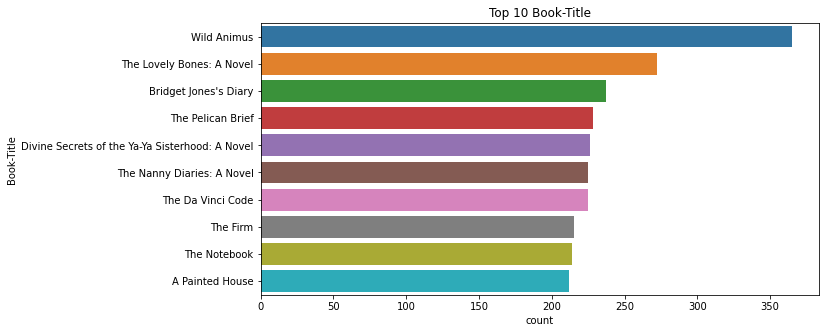

In [53]:
# Top 10 Books
plt.figure(figsize=(10,5))
sns.countplot(y='Book-Title',data=df, order=pd.value_counts(df['Book-Title']).iloc[:10].index)
plt.title('Top 10 Book-Title')
plt.show()



*   The top most book title found is Wild Animus.
Wild Animus is present in 365 rows

*   Wild Animus is present in 365 rows




In [54]:
# unique Authors count
df['Book-Author'].nunique()

579

In [55]:
# Top 10 Book Authors
df['Book-Author'].value_counts().head(10)

Stephen King                 2434
Nora Roberts                 2274
John Grisham                 1717
James Patterson              1674
Mary Higgins Clark           1329
Sue Grafton                  1275
Janet Evanovich              1165
Dean R. Koontz               1134
Patricia Daniels Cornwell     930
JOHN GRISHAM                  890
Name: Book-Author, dtype: int64

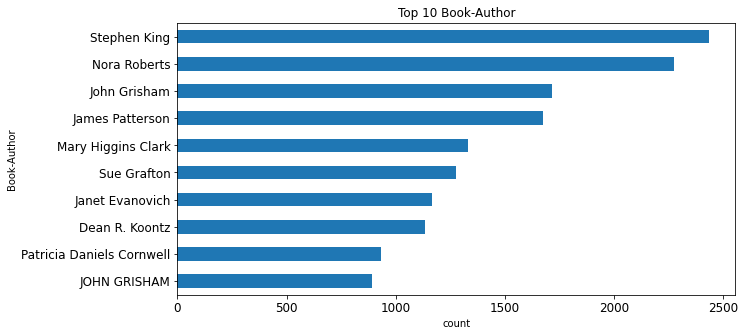

In [56]:
# Top 10 Book Authors
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = df['Book-Author'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Author', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Author')
plt.show()

In [64]:
df['Book-Author'].value_counts()

Stephen King                 2434
Nora Roberts                 2274
John Grisham                 1717
James Patterson              1674
Mary Higgins Clark           1329
                             ... 
David G. Uterson                1
DaphnÃ?Â© Du Maurier            1
Talmadge-Bickmore Deborah       1
Terry Coleman                   1
Jefferson Carter                1
Name: Book-Author, Length: 579, dtype: int64



*   The top most author found is Stephen King 
*   2434 books written by Stephen King



In [65]:
# COunt of Unique Publisher
df['Publisher'].nunique()

358

In [66]:
# Top 10 Publshers
df['Publisher'].value_counts().head(10).sort_values(ascending=True)

Jove Books                  1703
Signet Book                 1742
Dell Publishing Company     1812
Bantam Books                1933
Bantam                      2336
Dell                        2962
Pocket                      3273
Warner Books                3504
Berkley Publishing Group    3953
Ballantine Books            4540
Name: Publisher, dtype: int64

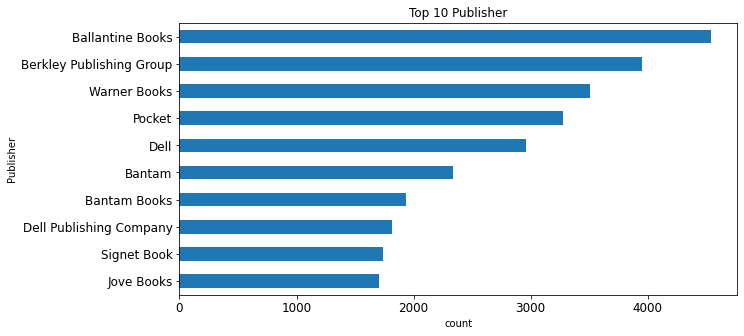

In [67]:
# Top 10 Publishers
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = df['Publisher'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Publisher', fontsize=12)
plt.xlabel('count')
plt.ylabel('Publisher')
plt.show()

In [68]:
df['Publisher'].value_counts().max()

4540



*   The top most Publishers found is Pocket.
10786 Books Published By Pocket.
*   List item

